### Tối ưu hàm số
Đầu vào:
- Hàm: $f(x, y) = \frac{x^4}{10} - \frac{2x^3}{15} - \frac{2x^2}{5}+y^2+\frac{32}{30}$
- $(x,y) \in {[lower, upper]}^2 $

Đầu ra: 
- Một lời giải $(x_i, y_i)$
- Giá trị nhỏ nhất $f_{min}(x,y)$

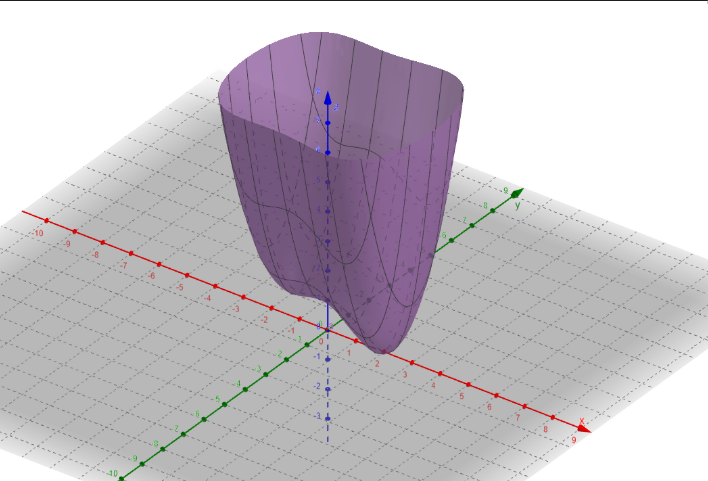

In [1094]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [1095]:
class Problem:
    def __init__(self, D, LB, UB):
        self.D = D
        self.LB = LB
        self.UB = UB

In [1096]:
def decode(position, problem: Problem):
    x = position * (problem.UB - problem.LB) + problem.LB
    x = np.clip(x, problem.LB, problem.UB)
    return x

def get_fitness(x):
    fx = x[0]**4/10 - 2*x[0]**3/15 - 2*x[0]**2/5 + x[-1]**2 + 32/30
    return fx

In [ ]:
class Individual:
    def __init__(self):
        self.position = None
        self.fitness = None 
        self.velocity = None
        self.bestFitness = None
        self.bestPosition = None
    
    def gen_indi(self, problem : Problem):
        self.velocity = np.random.uniform(0.1, 0.15, problem.D)
        self.position = np.random.uniform(0.0, 1.0, problem.D)
        self.fitness = get_fitness(decode(self.position, problem))
        self.bestFitness = self.fitness
        self.bestPosition = self.position

    def cal_fitness(self, problem : Problem):
        sol = decode(self.position, problem)
        self.fitness = get_fitness(sol)
        if self.bestFitness > self.fitness:
            self.bestFitness = self.fitness
            self.bestPosition = self.position
    
    def __repr__(self):
        result = f"position: {self.position},   fitness: {self.fitness}"
        #result += f"bestPosition: {self.bestPosition},   bestFitness: {self.bestFitness}"
        return result
    
    def move(self, global_best_position, w, c1, c2):
        r1 = np.random.rand()
        r2 = np.random.rand()
        self.velocity = w * self.velocity + r1 * c1 * (self.bestPosition - self.position) + r2 * c2 * (global_best_position - self.position)
        self.position += self.velocity
        self.position = np.clip(self.position, 0, 1)


In [1098]:
class Population:
    def __init__(self, pop_size, problem : Problem):
        self.pop_size = pop_size
        self.problem = problem 
        self.list_indi = []
        self.global_best_position = None
        self.global_best_fitness = None

    def gen_pop(self):
        f_indi = Individual()
        f_indi.gen_indi(self.problem)
        self.global_best_fitness = f_indi.fitness
        self.global_best_position = f_indi.position
        self.list_indi.append(f_indi)

        for i in range(1, self.pop_size):
            indi = Individual()
            indi.gen_indi(self.problem)
            if self.global_best_fitness > indi.fitness:
                self.global_best_fitness = indi.fitness
                self.global_best_position = indi.position
            self.list_indi.append(indi)

    def show(self):
        for indi in self.list_indi:
            print(indi)


In [1100]:
def PSO(problem: Problem, pop_size, max_gen, w, c1, c2):
    pop = Population(pop_size, problem)
    pop.gen_pop()
    history = []
    for i in range(max_gen):
        for indi in pop.list_indi:
            indi.move(pop.global_best_position, w, c1, c2)
            indi.cal_fitness(problem)
            if pop.global_best_fitness > indi.fitness:
                pop.global_best_fitness = indi.fitness
                pop.global_best_position = indi.position
        history.append(pop.list_indi[0].bestFitness)
    return history, pop.global_best_position

In [1101]:
#setup
D = 2
LB = -50
UB = 50
problem = Problem(D, LB, UB)

pop_size = 10
max_gen = 80000
w = 0.0001
c1 = 0.0001
c2 = 0.0001

fitness_history, solution = PSO(problem, pop_size, max_gen, w, c1, c2)

#show
for i in range(len(fitness_history)):
    print(f"Generation {i}, fitness = {fitness_history[i]:.2f}")

Generation 0, fitness = 2501.61
Generation 1, fitness = 2501.45
Generation 2, fitness = 2501.07
Generation 3, fitness = 2500.56
Generation 4, fitness = 2500.52
Generation 5, fitness = 2500.23
Generation 6, fitness = 2500.16
Generation 7, fitness = 2499.80
Generation 8, fitness = 2499.71
Generation 9, fitness = 2499.33
Generation 10, fitness = 2499.11
Generation 11, fitness = 2498.80
Generation 12, fitness = 2498.31
Generation 13, fitness = 2497.83
Generation 14, fitness = 2497.75
Generation 15, fitness = 2497.62
Generation 16, fitness = 2497.40
Generation 17, fitness = 2496.94
Generation 18, fitness = 2496.37
Generation 19, fitness = 2495.97
Generation 20, fitness = 2495.61
Generation 21, fitness = 2495.18
Generation 22, fitness = 2494.86
Generation 23, fitness = 2494.31
Generation 24, fitness = 2494.02
Generation 25, fitness = 2493.51
Generation 26, fitness = 2493.22
Generation 27, fitness = 2493.00
Generation 28, fitness = 2492.49
Generation 29, fitness = 2492.29
Generation 30, fitne

In [1102]:
#show
np.set_printoptions(precision=2, suppress=True)
print("solution:")
print(decode(solution, problem))
# print(solution.chromosome)
print(f"{get_fitness(decode(solution, problem)):.2f}")

solution:
[ 1.79 -0.24]
0.11


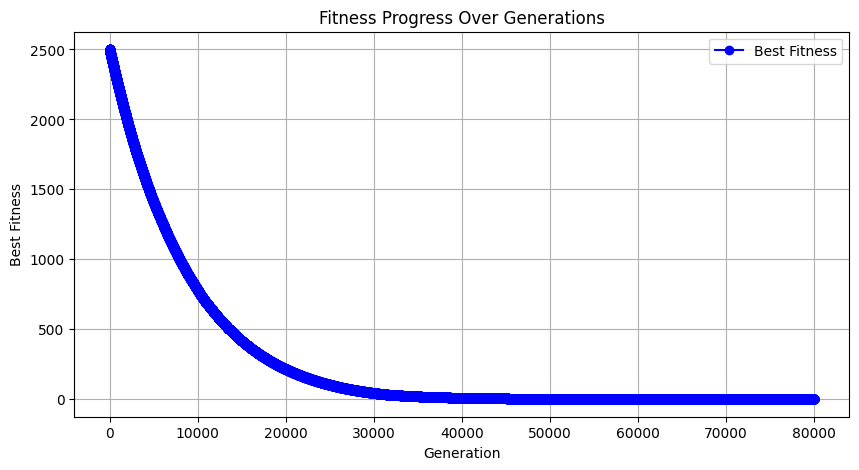

In [1103]:
generations = list(range(len(fitness_history)))
plt.figure(figsize=(10, 5))
plt.plot(generations, fitness_history, marker='o', linestyle='-', color='b', label='Best Fitness')

plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Fitness Progress Over Generations")
plt.legend()
plt.grid(True)
plt.show()

In [1104]:
print(decode(solution, problem))
print(get_fitness(decode(solution, problem)))

[ 1.79 -0.24]
0.10573999456051286
